In [8]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import numpy as np
import pandas as pd
import sklearn.svm as svm
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('data/neo_v2.csv')
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [5]:
# df.corr()

In [6]:
droppable = ['id', 'name', 'est_diameter_min', 'orbiting_body', 'sentry_object']

for drop in droppable:
    df.drop(drop, inplace=True, axis='columns')

In [7]:
df.head()

df_X = df.drop('hazardous', axis='columns')
df_X

,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,2.679415,13569.249224,5.483974e+07,16.73
1,0.594347,73588.726663,6.143813e+07,20.00
2,1.614507,114258.692129,4.979872e+07,17.83
3,0.215794,24764.303138,2.543497e+07,22.20
4,0.570217,42737.733765,4.627557e+07,20.09
...,...,...,...,...
90831,0.059435,52078.886692,1.230039e+07,25.00
90832,0.037501,46114.605073,5.432121e+07,26.00
90833,0.071456,7566.807732,2.840077e+07,24.60
90834,0.016370,69199.154484,6.869206e+07,27.80


In [8]:
dataset = df_X
numerical_features = ['est_diameter_max', 'relative_velocity','miss_distance', 'absolute_magnitude']

numeric_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', MinMaxScaler())
])

full_processor = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, numerical_features),
])

full_processor.fit(dataset)
X = pd.DataFrame(full_processor.transform(dataset), columns=full_processor.get_feature_names_out())
X

,number__est_diameter_max,number__relative_velocity,number__miss_distance,number__absolute_magnitude
0,0.031607,0.056447,0.733141,0.312891
1,0.006999,0.309922,0.821364,0.449312
2,0.019039,0.481680,0.665740,0.358782
3,0.002531,0.103726,0.339986,0.541093
4,0.006714,0.179632,0.618634,0.453066
...,...,...,...,...
90831,0.000685,0.219081,0.164371,0.657906
90832,0.000427,0.193893,0.726208,0.699625
90833,0.000827,0.031097,0.379640,0.641218
90834,0.000177,0.291384,0.918352,0.774718


In [9]:
X = X.to_numpy()
y = df['hazardous'].to_numpy()

In [10]:
X

array([[3.16072151e-02, 5.64469972e-02, 7.33140811e-01, 3.12891114e-01],
       [6.99859603e-03, 3.09921777e-01, 8.21364026e-01, 4.49311640e-01],
       [1.90388437e-02, 4.81679530e-01, 6.65740213e-01, 3.58781811e-01],
       ...,
       [8.27278640e-04, 3.10974339e-02, 3.79640314e-01, 6.41218189e-01],
       [1.77130265e-04, 2.91383698e-01, 9.18352249e-01, 7.74718398e-01],
       [1.03590911e-03, 1.13271142e-01, 7.99088943e-01, 6.21193158e-01]])

In [7]:
X

array([[3.16072151e-02, 5.64469972e-02, 7.33140811e-01, 3.12891114e-01],
       [6.99859603e-03, 3.09921777e-01, 8.21364026e-01, 4.49311640e-01],
       [1.90388437e-02, 4.81679530e-01, 6.65740213e-01, 3.58781811e-01],
       ...,
       [8.27278640e-04, 3.10974339e-02, 3.79640314e-01, 6.41218189e-01],
       [1.77130265e-04, 2.91383698e-01, 9.18352249e-01, 7.74718398e-01],
       [1.03590911e-03, 1.13271142e-01, 7.99088943e-01, 6.21193158e-01]])

In [7]:
X.shape

(90836, 4)

In [11]:
y.shape

(90836,)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

In [12]:
clf = svm.SVC(kernel='rbf', gamma='scale', C=100, probability=True)
clf.fit(X_train,y_train)

SVC(C=100, probability=True)

In [13]:
y_pred = clf.predict(X_test)

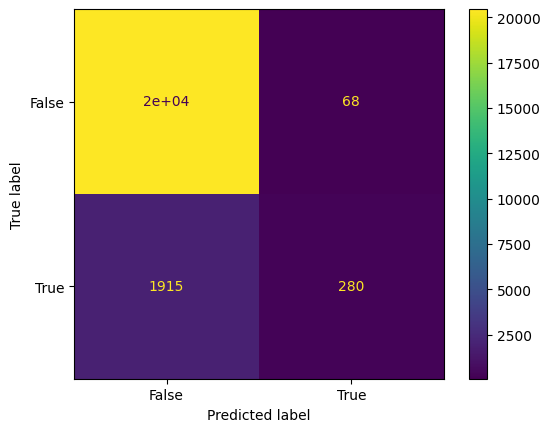

In [14]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [15]:
# parametry = {"C": [0.1,10,1000,10000,100000],
#              "kernel": ['rbf', 'sigmoid']}
# clf_gs = GridSearchCV(svm.SVC(), param_grid=parametry, scoring="recall")
# clf_gs.fit(X_train,y_train)




In [16]:
# clf_gs.best_params_

In [17]:
# yp_gs = clf_gs.best_estimator_.predict(X_test)
# metrics.ConfusionMatrixDisplay.from_predictions(y_test, yp_gs);

In [18]:
y_proba = clf.predict_proba(X_test)

NameError: name 'clf' is not defined

In [13]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.91      1.00      0.95     20514
        True       0.80      0.13      0.22      2195

    accuracy                           0.91     22709
   macro avg       0.86      0.56      0.59     22709
weighted avg       0.90      0.91      0.88     22709



In [21]:
thresholds = np.arange(0.005, 0.2, 0.01)
precision = []
recall = []
f1 = []

for threshold in thresholds:
    y_proba = clf.predict_proba(X_test)[:,1]
    y_predicted = y_proba > threshold

    clf_rep = classification_report(y_test, y_predicted, output_dict=True)
    
    precision.append(clf_rep['True']['precision'])
    recall.append(clf_rep['True']['recall'])
    f1.append(clf_rep['True']['f1-score'])

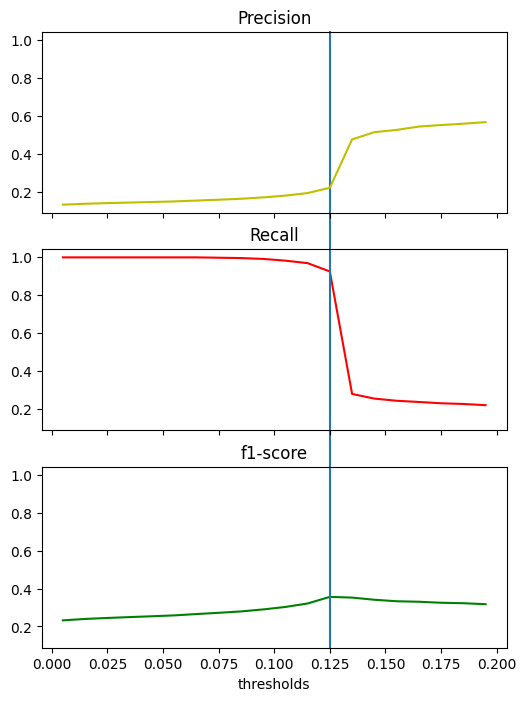

In [22]:
fig, axs = plt.subplots(3,1, sharex=True, sharey=True)
fig.set_figheight(8)
fig.set_figwidth(6)

axs[0].plot(thresholds,precision, color='y')
axs[0].set_title('Precision')

axs[1].plot(thresholds,recall, color='r')
axs[1].set_title('Recall')

axs[2].plot(thresholds,f1, color='g')
axs[2].set_title('f1-score')
axs[2].set_xlabel('thresholds')

axs[0].axvline(x=0.125, ymax = 1, ymin = -2, clip_on = False, zorder = -1)
axs[1].axvline(x=0.125)
axs[2].axvline(x=0.125)

              precision    recall  f1-score   support

       False       0.99      0.60      0.75     20514
        True       0.20      0.96      0.34      2195

    accuracy                           0.63     22709
   macro avg       0.60      0.78      0.54     22709
weighted avg       0.92      0.63      0.71     22709



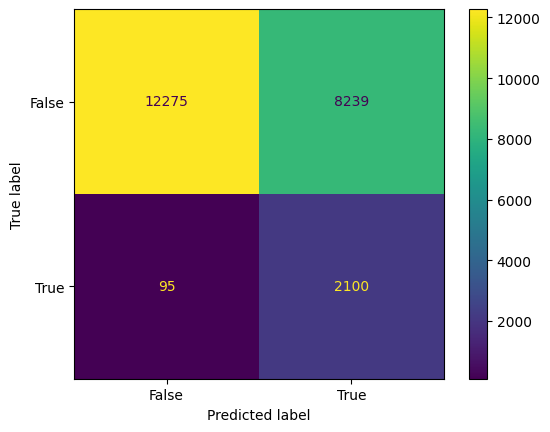

In [23]:
y_proba = clf.predict_proba(X_test)[:,1]
y_predicted = y_proba > 0.12

print(classification_report(y_test, y_predicted))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predicted);

### Oversampling

In [39]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

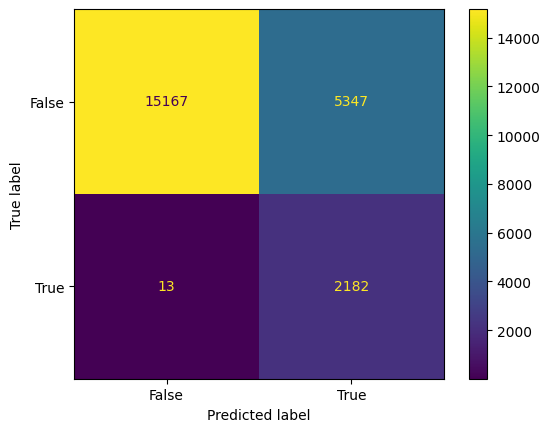

In [26]:
y_pred = clf.predict(X_test)
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [28]:
print(classification_report(y_test, y_pred))2

              precision    recall  f1-score   support

       False       1.00      0.74      0.85     20514
        True       0.29      0.99      0.45      2195

    accuracy                           0.76     22709
   macro avg       0.64      0.87      0.65     22709
weighted avg       0.93      0.76      0.81     22709



In [34]:
thresholds = np.arange(0.3, 0.9, 0.03)
precision = []
recall = []
f1 = []

for threshold in thresholds:
    y_proba = clf.predict_proba(X_test)[:,1]
    y_predicted = y_proba > threshold

    clf_rep = classification_report(y_test, y_predicted, output_dict=True)
    
    precision.append(clf_rep['True']['precision'])
    recall.append(clf_rep['True']['recall'])
    f1.append(clf_rep['True']['f1-score'])

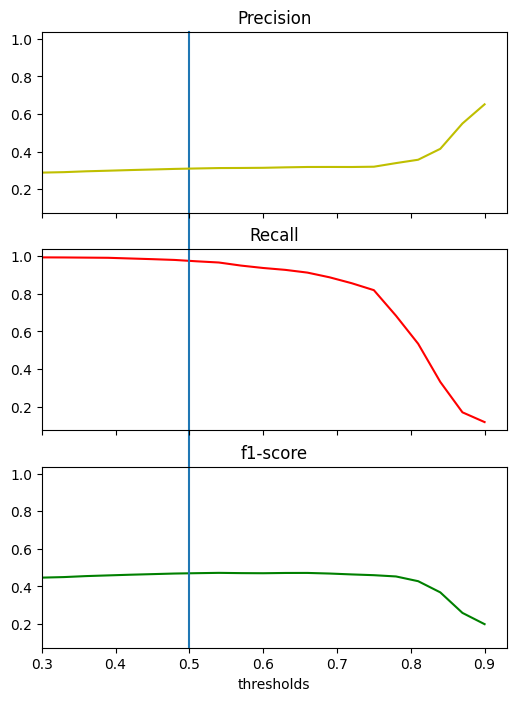

In [37]:
fig, axs = plt.subplots(3,1, sharex=True, sharey=True)
fig.set_figheight(8)
fig.set_figwidth(6)

axs[0].plot(thresholds,precision, color='y')
axs[0].set_title('Precision')

axs[1].plot(thresholds,recall, color='r')
axs[1].set_title('Recall')

axs[2].plot(thresholds,f1, color='g')
axs[2].set_title('f1-score')
axs[2].set_xlabel('thresholds')

axs[0].axvline(x=0.5, ymax = 1, ymin = -2, clip_on = False, zorder = -1)
axs[1].axvline(x=0.5)
axs[2].axvline(x=0.5)

axs[0].set_xlim(xmin=0.3)
axs[1].set_xlim(xmin=0.3)
axs[2].set_xlim(xmin=0.3)
plt.show(fig);

In [21]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, fbeta_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold
from time import time

In [25]:
def run_model(model, X, y, cross_val):
    """
    funkcja przeprowadzająca trening na liście modeli

    input:
            model: model estymatora z pakietu sklearn
            X: cechy do przeprowadzenia uczenia
            y: target
            cross_val: rodzaj walidacji
    output/print:
            fbeta_res: wynik fbeta na każdy fold / później uśredniony
            accuracy_res: wynik accuracy na każdy fold / później uśredniony
            cross_val_time: total scoring time dla obu metryk
    """
    model_name = type(model).__name__

    fbeta_scorer = make_scorer(fbeta_score, beta=0.2)
    
    start = time()
    fbeta_res = cross_val_score(model, X, y, cv=cross_val, scoring=fbeta_scorer)
    accuracy_res = cross_val_score(model, X, y, cv=cross_val, scoring='accuracy')
    end = time()
    cross_val_time = end-start
    print("{} fbeta: {:.4f}, accuracy: {:.4f}, time: {}".format(model_name, np.mean(fbeta_res), np.mean(accuracy_res), cross_val_time))

In [26]:
skf = StratifiedKFold(n_splits=4, shuffle=True)

# zdefiniowanie prostych modeli
Dummy_model = DummyClassifier(strategy="stratified") 
LR_model = LogisticRegression()
DT_model = DecisionTreeClassifier()
RF_model = RandomForestClassifier()
XGB_model = XGBClassifier(eval_metric='error')
Gaussian_model = GaussianNB()
KNN_model = KNeighborsClassifier()
SVC_model = svm.SVC()


# dodanie modeli do listy, po której będziemy iterowali
models = [SVC_model, Dummy_model, LR_model, DT_model, RF_model, XGB_model, Gaussian_model, KNN_model]

In [43]:
for model in models:
    run_model(model,X_resampled,y_resampled, skf)

SVC fbeta: 0.7883, accuracy: 0.8590, time: 1488.5535929203033
DummyClassifier fbeta: 0.5035, accuracy: 0.5000, time: 0.10700345039367676
LogisticRegression fbeta: 0.8062, accuracy: 0.8440, time: 0.8089966773986816
DecisionTreeClassifier fbeta: 0.9387, accuracy: 0.9661, time: 3.619999885559082
RandomForestClassifier fbeta: 0.9388, accuracy: 0.9647, time: 151.99100041389465
XGBClassifier fbeta: 0.8426, accuracy: 0.9009, time: 1.9239990711212158
GaussianNB fbeta: 0.7952, accuracy: 0.8376, time: 0.24100351333618164
KNeighborsClassifier fbeta: 0.8615, accuracy: 0.9143, time: 11.519000768661499


In [40]:
clf = RandomForestClassifier()
clf.fit(X_resampled,y_resampled)

RandomForestClassifier()

              precision    recall  f1-score   support

       False       0.94      0.95      0.95     20402
        True       0.54      0.51      0.52      2307

    accuracy                           0.91     22709
   macro avg       0.74      0.73      0.74     22709
weighted avg       0.90      0.91      0.91     22709



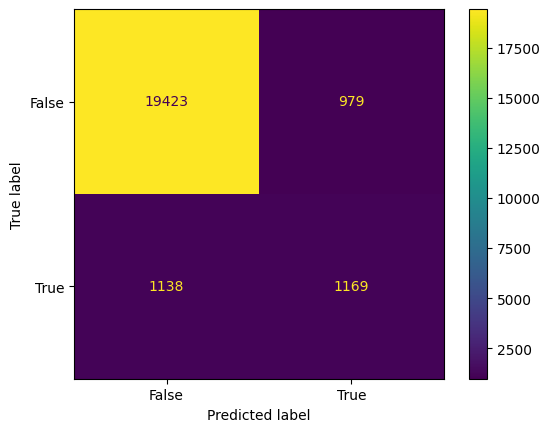

In [41]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

              precision    recall  f1-score   support

       False       1.00      0.72      0.84     20402
        True       0.29      1.00      0.45      2307

    accuracy                           0.75     22709
   macro avg       0.64      0.86      0.64     22709
weighted avg       0.93      0.75      0.80     22709



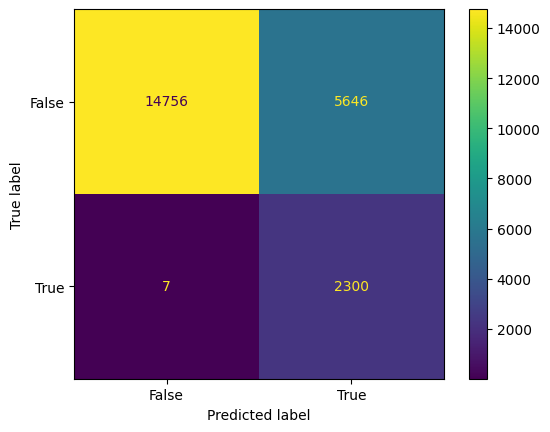

In [42]:
clf = svm.SVC()
clf.fit(X_resampled,y_resampled)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)